In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from openpyxl import load_workbook

In [87]:
cep_file_path = "C:\\Users\\GE796684\\Downloads\\Pattern1Multi\\CEPLetMem.xlsx"
sp_file_path = "C:\\Users\\GE796684\\Downloads\\Pattern1Multi\\SPLetMem.xlsx"

# Define the columns and row range
columns = ["B", "D", "F", "H", "J"]
excel_sheets = ["LatP3", "LatP6", "LatP9"]
start_row = 2

In [88]:
custom_palette = {
    "LatP9": "#FFDAB9",  # light orange
    "LatP6": "#90EE90",  # light green
    "LatP3": "#ADD8E6",  # light blue
}

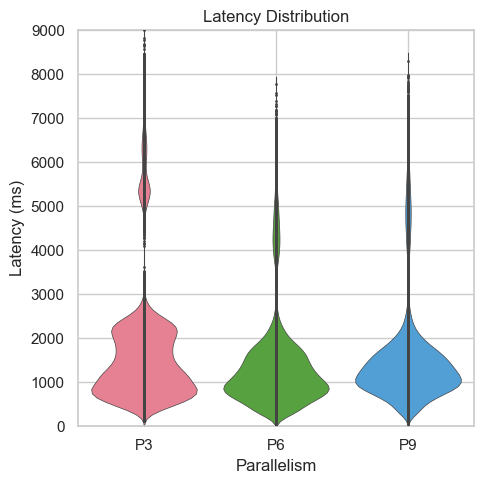

In [89]:
# Open the workbook
wb = load_workbook(filename=cep_file_path, data_only=True)

end_row = 44884

# Extract data into a dictionary
data = {ss: [] for ss in excel_sheets}

sheet_names = excel_sheets
for sh in sheet_names:
    sheet = wb[sh]
    for col in columns:
        for row in range(start_row, end_row + 1):
            data[sh].append(sheet[f"{col}{row}"].value)

# Convert to a DataFrame for seaborn
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(var_name="Parallelism", value_name="Latency")

# Plot a violin plot
#(8,6)
plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    data=df_melted,
    inner="point",
    palette="husl",
    hue="Parallelism",
    linewidth=0.5,
)

plt.title("Latency Distribution")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0, 1, 2], labels=["P3", "P6", "P9"])

plt.grid(True)
plt.tight_layout()
# Set y-axis scale using the variable
plt.ylim(0, 9_000)
plt.savefig("cep_violin_plot.pdf", format="pdf")
plt.show()

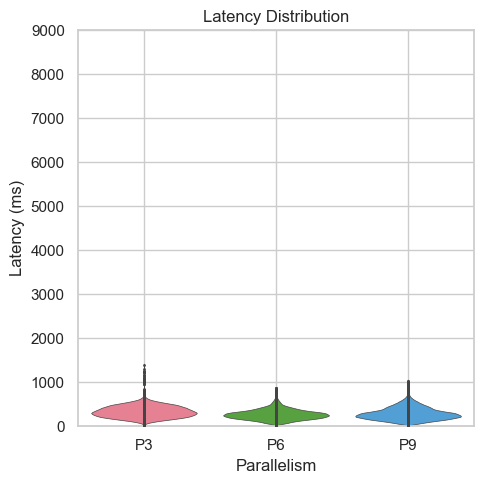

In [90]:
# Open the workbook
wb = load_workbook(filename=sp_file_path, data_only=True)

end_row = 44883

# Extract data into a dictionary
data = {ss: [] for ss in excel_sheets}

sheet_names = excel_sheets
for sh in sheet_names:
    sheet = wb[sh]
    for col in columns:
        for row in range(start_row, end_row + 1):
            data[sh].append(sheet[f"{col}{row}"].value)

# Convert to a DataFrame for seaborn
df = pd.DataFrame(data)

# Melt the DataFrame for seaborn compatibility
df_melted = df.melt(var_name="Parallelism", value_name="Latency")

# Plot a violin plot
plt.figure(figsize=(5, 5))
sns.violinplot(
    x="Parallelism",
    y="Latency",
    data=df_melted,
    inner="point",
    palette="husl",
    hue="Parallelism",
    linewidth=0.5,
)

plt.title("Latency Distribution")
plt.ylabel("Latency (ms)")
plt.xlabel("Parallelism")

plt.xticks(ticks=[0, 1, 2], labels=["P3", "P6", "P9"])

plt.grid(True)
plt.tight_layout()
plt.ylim(0, 9_000)
plt.savefig("sp_violin_plot.pdf", format="pdf", bbox_inches="tight")
plt.show()